In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread("./shapes.png")
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

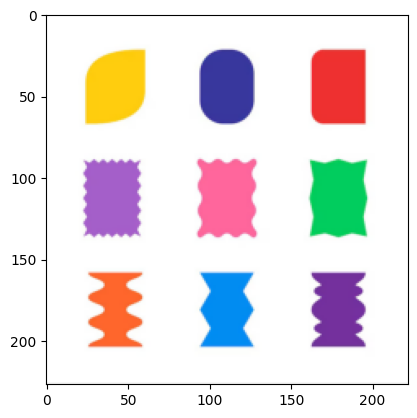

In [3]:
plt.imshow(image_rgb)

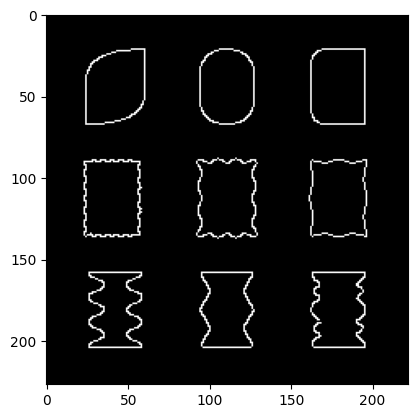

In [4]:
gray = cv2.Canny(image_grey,80,150)

plt.imshow(gray,cmap="grey")

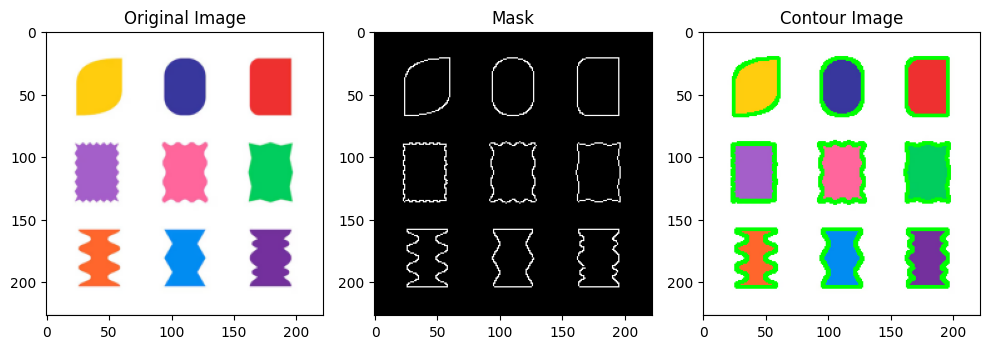

In [8]:
contours, hierarcy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image,contours,-1,(0,255,0),2)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(gray,cmap="grey")
plt.title("Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.tight_layout()
plt.show()

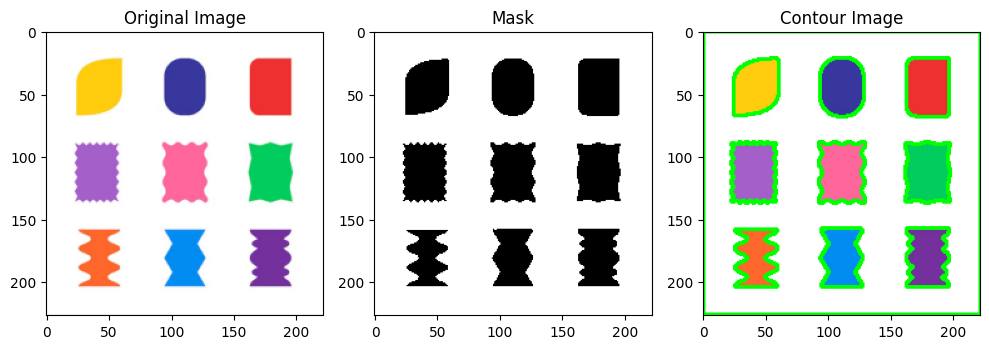

In [9]:
retval, binary = cv2.threshold(image_grey,200,255,cv2.THRESH_BINARY)

contours, hierarcy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image,contours,-1,(0,255,0),2)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(binary,cmap="grey")
plt.title("Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.tight_layout()
plt.show()

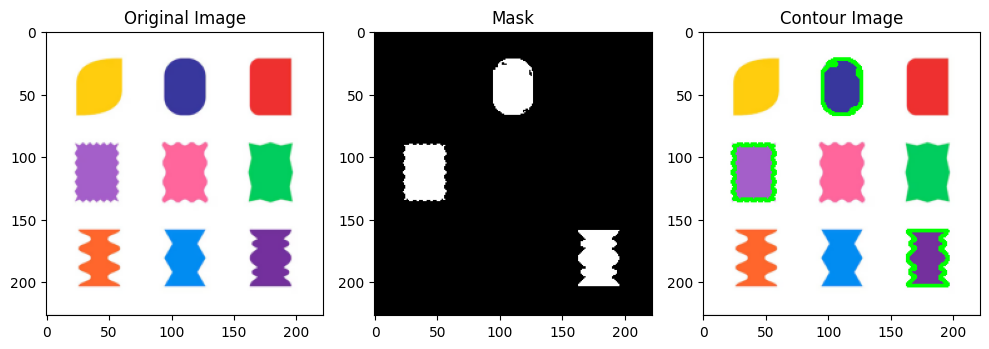

In [ ]:
#working with colored image

lower_bound = np.array([120,100,0],dtype=np.uint8)
upper_bound = np.array([160,185,255],dtype=np.uint8)

image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(image_hsv,lower_bound,upper_bound)

contours, hierarcy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image,contours,-1,(0,255,0),2)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="grey")
plt.title("Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.tight_layout()
plt.show()

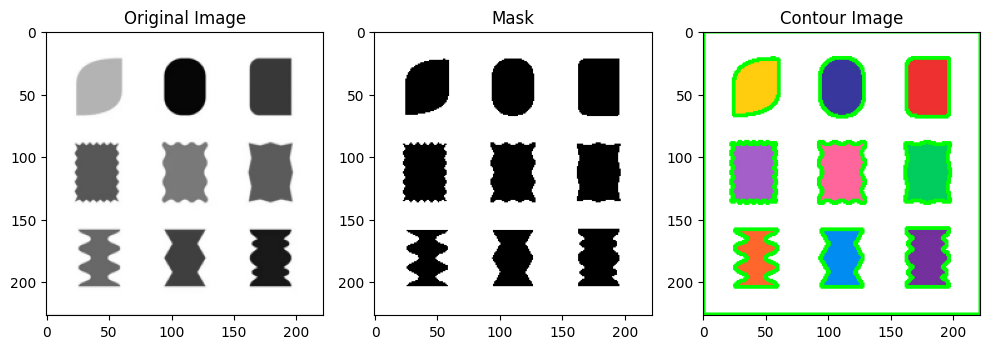

In [ ]:
# Working with grey scale

lower_bound = np.array([200],dtype=np.uint8)
upper_bound = np.array([255],dtype=np.uint8)

image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(image_grey,lower_bound,upper_bound)

contours, hierarcy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

contour_image = image.copy()
cv2.drawContours(contour_image,contours,-1,(0,255,0),2)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_grey,cmap='grey')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="grey")
plt.title("Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.tight_layout()
plt.show()

In [18]:
# Removing box contour

lower_bound = np.array([200],dtype=np.uint8)
upper_bound = np.array([255],dtype=np.uint8)

image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(image_grey,lower_bound,upper_bound)

contours, hierarcy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours,key=cv2.contourArea,reverse=True)

print(len(sorted_contours))
contours = sorted_contours[1:10]

10


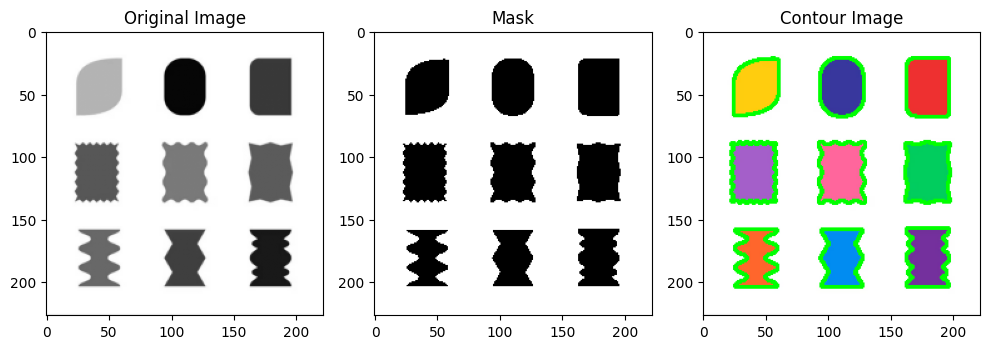

In [22]:
contour_image = image.copy()
cv2.drawContours(contour_image,contours,-1,(0,255,0),2)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_grey,cmap='grey')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="grey")
plt.title("Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.tight_layout()
plt.show()

In [23]:
# Making bounding box

lower_bound = np.array([200],dtype=np.uint8)
upper_bound = np.array([255],dtype=np.uint8)

image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(image_grey,lower_bound,upper_bound)

contours, hierarcy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours,key=cv2.contourArea,reverse=True)

print(len(sorted_contours))
contours = sorted_contours[1:10]

10


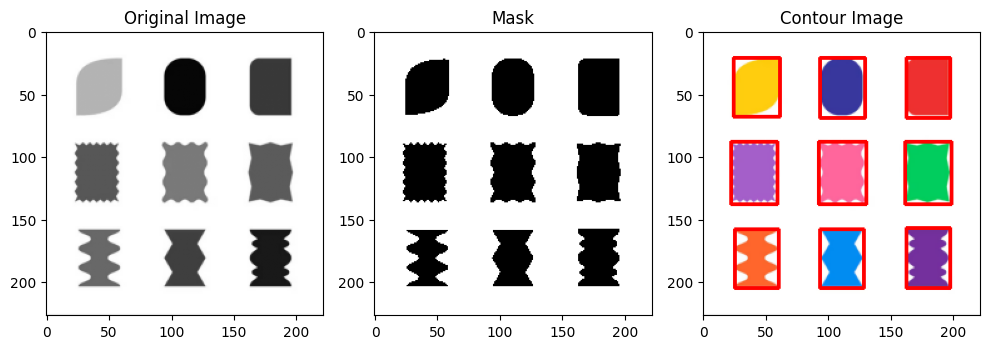

In [24]:
contour_image = image.copy()

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(contour_image,(x,y),(x+w,y+h),(0,0,255),2)


# cv2.drawContours(contour_image,contours,-1,(0,255,0),2)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(image_grey,cmap='grey')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(mask,cmap="grey")
plt.title("Mask")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(contour_image,cv2.COLOR_BGR2RGB))
plt.title("Contour Image")

plt.tight_layout()
plt.show()